In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import preprocessing

In [2]:
df_sky = pd.read_csv("Skyserver.csv")
df_sky

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [3]:
df_sky.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [4]:
df_sky.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [5]:
df_sky.shape

(10000, 18)

# EDA

In [6]:
df_sky.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [7]:
label_encoder = preprocessing.LabelEncoder()

In [8]:
df_sky['class']=label_encoder.fit_transform(df_sky['class'])

In [9]:
df_sky

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,0,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,0,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,2,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,0,0.014019,447,51877,229


In [10]:
df_sky.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class          int64
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

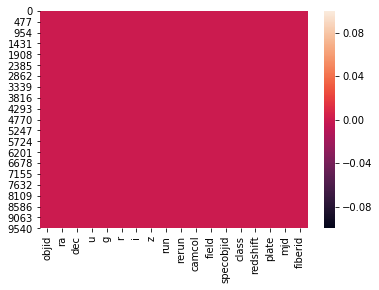

In [11]:
sns.heatmap(df_sky.isnull())

In [12]:
df_sky.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.915400,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.952856,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,0.000000,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000000,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,1.000000,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,2.000000,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,2.000000,5.353854,8410.000000,57481.000000,1000.000000


In [13]:
df_sky.skew()

objid        1.000150
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [15]:
df_sky

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,0,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,0,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,2,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,0,0.014019,447,51877,229


In [16]:
df_x=df_sky.drop(columns=["class"])
y=pd.DataFrame(df_sky["class"])

In [17]:
df_x

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,0.014019,447,51877,229


In [18]:
y

,class
0,2
1,2
2,0
3,2
4,2
...,...
9995,0
9996,0
9997,2
9998,0


In [19]:
df_sky.skew()

objid        1.000150
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x,columns=df_x.columns)

In [22]:
x

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,0.0,0.167458,-0.584923,1.031486,-0.348559,-0.837280,-0.946058,-0.995342,-0.838061,0.0,0.210852,-0.217630,1.031501,-0.369731,1.031489,1.309311,0.668632
1,0.0,0.168862,-0.583114,0.052430,-0.166533,-0.154155,-0.082645,-0.026043,-0.838061,0.0,0.210852,-0.217630,-0.636183,-0.369849,-0.636213,-0.879197,0.911012
2,0.0,0.170574,-0.583475,0.921568,0.867093,0.593154,0.441201,0.314528,-0.838061,0.0,0.210852,-0.211479,-0.656313,-0.053027,-0.656339,-0.609191,0.775279
3,0.0,0.174558,-0.586501,-1.030630,-0.813627,-0.636692,-0.526604,-0.430921,-0.838061,0.0,0.210852,-0.205328,1.031506,-0.369993,1.031489,1.309311,0.760736
4,0.0,0.174825,-0.584412,-1.290232,-1.172519,-0.376762,-0.025101,0.158276,-0.838061,0.0,0.210852,-0.205328,1.031506,-0.368189,1.031489,1.309311,0.770431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,-0.925337,1.455852,0.239453,0.104292,0.069416,0.087121,0.068876,1.331785,0.0,-0.389352,-0.869659,-0.566899,-0.298756,-0.566888,-0.705811,-0.519029
9996,0.0,-0.925553,1.461079,-0.418536,0.070402,0.220993,0.116515,0.229516,1.331785,0.0,-0.389352,-0.863508,-0.566901,-0.066761,-0.566888,-0.705811,-0.606286
9997,0.0,-0.920395,1.460907,0.167538,0.429347,0.634775,0.743983,0.829211,1.331785,0.0,-0.389352,-0.863508,3.266103,-0.370741,3.266087,2.693094,1.303667
9998,0.0,-0.921973,1.464321,0.318018,0.569857,0.646764,0.682516,0.595986,1.331785,0.0,-0.389352,-0.857356,-0.566901,-0.333647,-0.566888,-0.705811,-0.601438


In [23]:
y

,class
0,2
1,2
2,0
3,2
4,2
...,...
9995,0
9996,0
9997,2
9998,0


# Modelling

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20,stratify=y)

In [26]:
print(x_train.shape,x_test.shape)

(8000, 17) (2000, 17)


In [27]:
print(y_train.shape,y_test.shape)

(8000, 1) (2000, 1)


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [29]:
KNN=KNeighborsClassifier(n_neighbors=10)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=20)
GNB=GaussianNB()
RF=RandomForestClassifier()

In [30]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RF))

In [31]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

**************************** KNeighborsClassifier ********************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


Accuracy score =  0.9005




/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_val

Cross_val_Score =  0.8905026589026589




classification_report
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1000
           1       0.99      0.81      0.89       170
           2       0.94      0.84      0.89       830

    accuracy                           0.90      2000
   macro avg       0.93      0.87      0.90      2000
weighted avg       0.91      0.90      0.90      2000



[[962   0  38]
 [ 22 138  10]
 [128   1 701]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



**************************** SVC ********************************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


Accuracy score =  0.958




/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gam

Cross_val_Score =  0.9567995845995846




classification_report
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1000
           1       0.99      0.91      0.95       170
           2       0.96      0.96      0.96       830

    accuracy                           0.96      2000
   macro avg       0.97      0.94      0.96      2000
weighted avg       0.96      0.96      0.96      2000



[[969   1  30]
 [ 14 154   2]
 [ 37   0 793]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



**************************** LogisticRegression ********************************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy score =  0.96




/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishaln/opt/anacond

Cross_val_Score =  0.9553012847012846




classification_report
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1000
           1       0.99      0.89      0.94       170
           2       0.96      0.96      0.96       830

    accuracy                           0.96      2000
   macro avg       0.97      0.94      0.95      2000
weighted avg       0.96      0.96      0.96      2000



[[970   1  29]
 [ 18 152   0]
 [ 32   0 798]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



**************************** DecisionTreeClassifier ********************************


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       ra

/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was e

AxesSubplot(0.125,0.808774;0.62x0.0712264)



**************************** RandomForestClassifier ********************************


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Accuracy score =  0.99




/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_valida

Cross_val_Score =  0.9870994944994944




classification_report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1000
           1       0.99      0.89      0.94       170
           2       1.00      1.00      1.00       830

    accuracy                           0.99      2000
   macro avg       0.99      0.96      0.98      2000
weighted avg       0.99      0.99      0.99      2000



[[999   1   0]
 [ 19 151   0]
 [  0   0 830]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)





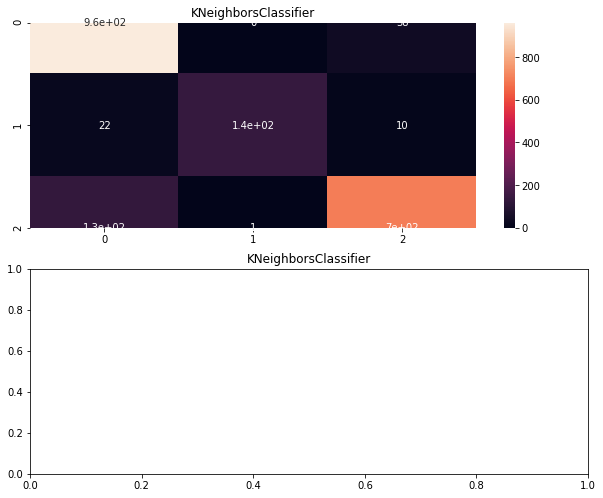

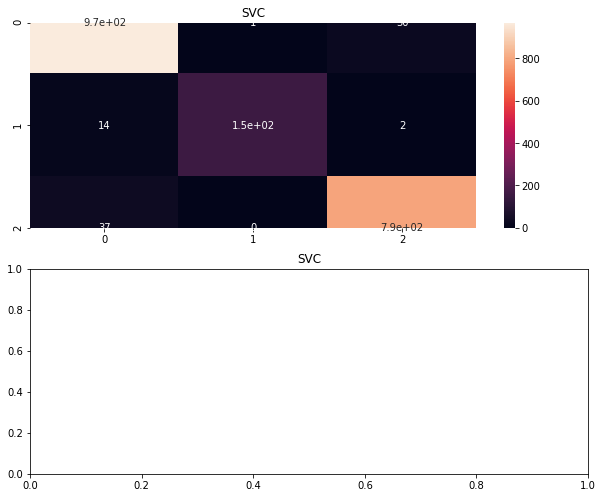

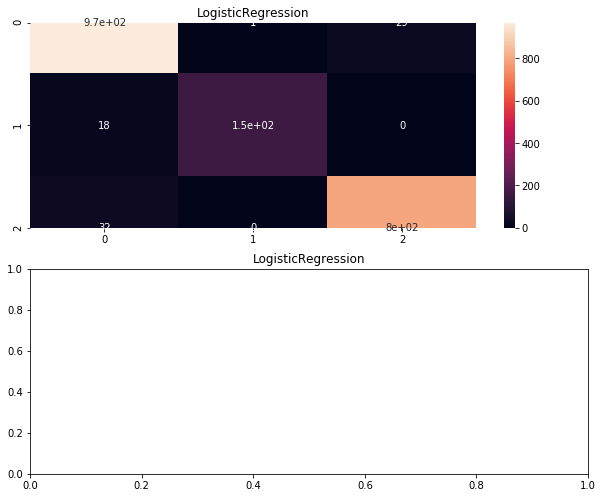

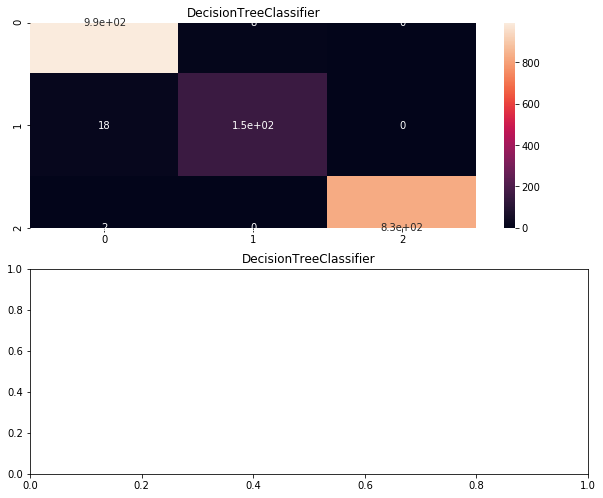

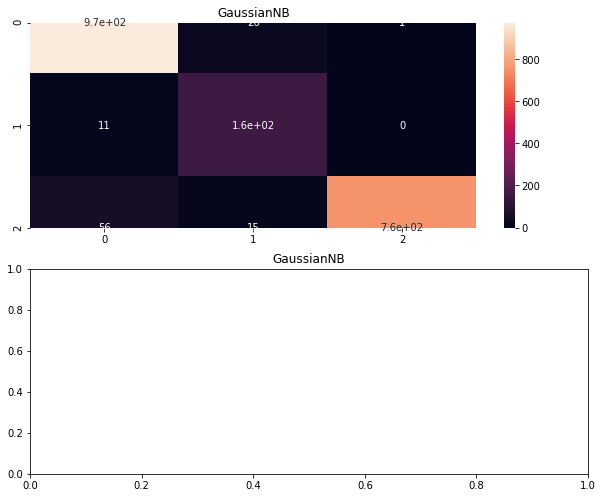

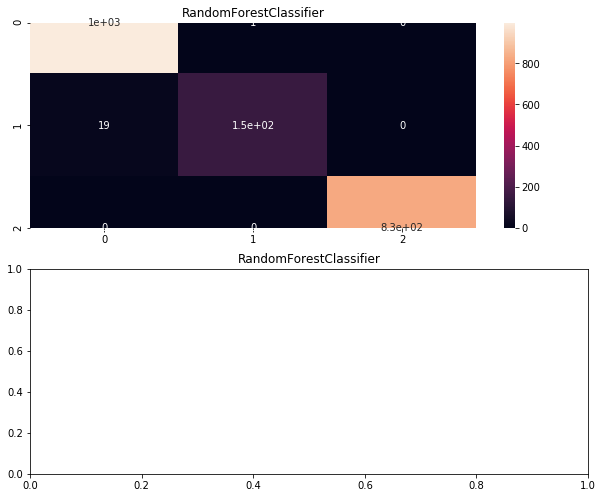

In [33]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('****************************',name,'********************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train.values.ravel())
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score = ', AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_Score = ', sc)
    cvs.append(sc*100)
    print('\n')
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    print('\n\n')

In [35]:
result=pd.DataFrame({'Model': Model, 'Accuracy_score': score, 'Cross_val_score':cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,90.05,89.050266
1,SVC,95.80,95.679958
2,LogisticRegression,96.00,95.530128
3,DecisionTreeClassifier,98.60,98.320059
4,GaussianNB,94.55,94.129708
5,RandomForestClassifier,99.00,98.709949


# Model Selection